In [132]:
import pandas as pd
file_path = 'C:/Users/loydt/Documents/datasets/raw/Electronic_sales_Sep2023-Sep2024.csv'
df = pd.read_csv(file_path)

In [133]:
df.head()

,Customer ID,Age,Gender,Loyalty Member,Product Type,SKU,Rating,Order Status,Payment Method,Total Price,Unit Price,Quantity,Purchase Date,Shipping Type,Add-ons Purchased,Add-on Total
0,1000,53,Male,No,Smartphone,SKU1004,2,Cancelled,Credit Card,5538.33,791.19,7,2024-03-20,Standard,"Accessory,Accessory,Accessory",40.21
1,1000,53,Male,No,Tablet,SKU1002,3,Completed,Paypal,741.09,247.03,3,2024-04-20,Overnight,Impulse Item,26.09
2,1002,41,Male,No,Laptop,SKU1005,3,Completed,Credit Card,1855.84,463.96,4,2023-10-17,Express,NaN,0.00
3,1002,41,Male,Yes,Smartphone,SKU1004,2,Completed,Cash,3164.76,791.19,4,2024-08-09,Overnight,"Impulse Item,Impulse Item",60.16
4,1003,75,Male,Yes,Smartphone,SKU1001,5,Completed,Cash,41.50,20.75,2,2024-05-21,Express,Accessory,35.56


In [134]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Customer ID        20000 non-null  int64  
 1   Age                20000 non-null  int64  
 2   Gender             19999 non-null  object 
 3   Loyalty Member     20000 non-null  object 
 4   Product Type       20000 non-null  object 
 5   SKU                20000 non-null  object 
 6   Rating             20000 non-null  int64  
 7   Order Status       20000 non-null  object 
 8   Payment Method     20000 non-null  object 
 9   Total Price        20000 non-null  float64
 10  Unit Price         20000 non-null  float64
 11  Quantity           20000 non-null  int64  
 12  Purchase Date      20000 non-null  object 
 13  Shipping Type      20000 non-null  object 
 14  Add-ons Purchased  15132 non-null  object 
 15  Add-on Total       20000 non-null  float64
dtypes: float64(3), int64(4

In [135]:
df.describe()

,Customer ID,Age,Rating,Total Price,Unit Price,Quantity,Add-on Total
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,10483.526550,48.994100,3.093950,3180.133419,578.631867,5.485550,62.244848
std,5631.732525,18.038745,1.223764,2544.978675,312.274076,2.870854,58.058431
min,1000.000000,18.000000,1.000000,20.750000,20.750000,1.000000,0.000000
25%,5478.000000,33.000000,2.000000,1139.680000,361.180000,3.000000,7.615000
50%,10499.500000,49.000000,3.000000,2534.490000,463.960000,5.000000,51.700000
75%,15504.000000,65.000000,4.000000,4639.600000,791.190000,8.000000,93.842500
max,19998.000000,80.000000,5.000000,11396.800000,1139.680000,10.000000,292.770000


In [136]:
missing_data = df.isna().sum()
missing_data

Customer ID             0
Age                     0
Gender                  1
Loyalty Member          0
Product Type            0
SKU                     0
Rating                  0
Order Status            0
Payment Method          0
Total Price             0
Unit Price              0
Quantity                0
Purchase Date           0
Shipping Type           0
Add-ons Purchased    4868
Add-on Total            0
dtype: int64

**Check for missing data**

In [137]:
missing_rows = df[df[['Add-ons Purchased']].isna().any(axis=1)]
missing_rows.head()

,Customer ID,Age,Gender,Loyalty Member,Product Type,SKU,Rating,Order Status,Payment Method,Total Price,Unit Price,Quantity,Purchase Date,Shipping Type,Add-ons Purchased,Add-on Total
2,1002,41,Male,No,Laptop,SKU1005,3,Completed,Credit Card,1855.84,463.96,4,2023-10-17,Express,NaN,0.0
6,1005,25,Female,No,Smartwatch,SKU1003,3,Completed,Paypal,7603.47,844.83,9,2024-01-30,Overnight,NaN,0.0
9,1006,24,Male,Yes,Laptop,SKU1005,3,Completed,Cash,4175.64,463.96,9,2024-01-01,Express,NaN,0.0
18,1016,61,Male,Yes,Smartphone,SKU1001,5,Completed,Paypal,103.75,20.75,5,2024-07-07,Overnight,NaN,0.0
20,1019,45,Male,No,Smartphone,SKU1001,5,Cancelled,Cash,83.00,20.75,4,2024-03-14,Express,NaN,0.0


In [138]:
gender_distribution = df['Gender'].value_counts()
gender_distribution

Gender
Male      10164
Female     9835
Name: count, dtype: int64

Since only one value is missing in the 'Gender' column, let's fill it with 'Female'.

In [139]:
df['Gender'] = df['Gender'].fillna('Female')

In this case, we can remove the "Add-ons Purchased" column since it doesn't provide valuable information

In [140]:
df = df.drop(columns=['Add-ons Purchased'])

df.head()

,Customer ID,Age,Gender,Loyalty Member,Product Type,SKU,Rating,Order Status,Payment Method,Total Price,Unit Price,Quantity,Purchase Date,Shipping Type,Add-on Total
0,1000,53,Male,No,Smartphone,SKU1004,2,Cancelled,Credit Card,5538.33,791.19,7,2024-03-20,Standard,40.21
1,1000,53,Male,No,Tablet,SKU1002,3,Completed,Paypal,741.09,247.03,3,2024-04-20,Overnight,26.09
2,1002,41,Male,No,Laptop,SKU1005,3,Completed,Credit Card,1855.84,463.96,4,2023-10-17,Express,0.00
3,1002,41,Male,Yes,Smartphone,SKU1004,2,Completed,Cash,3164.76,791.19,4,2024-08-09,Overnight,60.16
4,1003,75,Male,Yes,Smartphone,SKU1001,5,Completed,Cash,41.50,20.75,2,2024-05-21,Express,35.56


In [141]:
unique_values = {col: df[col].unique() for col in df.columns}
unique_values

{'Customer ID': array([ 1000,  1002,  1003, ..., 19996, 19997, 19998]),
 'Age': array([53, 41, 75, 25, 24, 35, 66, 72, 42, 73, 22, 61, 34, 45, 57, 71, 76,
        49, 77, 79, 69, 20, 54, 32, 60, 56, 65, 67, 50, 30, 21, 37, 62, 64,
        44, 27, 46, 58, 26, 55, 74, 31, 19, 68, 63, 33, 40, 80, 36, 18, 23,
        70, 29, 78, 52, 43, 47, 48, 38, 39, 59, 51, 28]),
 'Gender': array(['Male', 'Female'], dtype=object),
 'Loyalty Member': array(['No', 'Yes'], dtype=object),
 'Product Type': array(['Smartphone', 'Tablet', 'Laptop', 'Smartwatch', 'Headphones'],
       dtype=object),
 'SKU': array(['SKU1004', 'SKU1002', 'SKU1005', 'SKU1001', 'SKU1003', 'LTP123',
        'SMP234', 'TBL345', 'HDP456', 'SWT567'], dtype=object),
 'Rating': array([2, 3, 5, 1, 4]),
 'Order Status': array(['Cancelled', 'Completed'], dtype=object),
 'Payment Method': array(['Credit Card', 'Paypal', 'Cash', 'Debit Card', 'Bank Transfer',
        'PayPal'], dtype=object),
 'Total Price': array([ 5538.33,   741.09,  1855.8

There are two similar values in the "Payment Method". We will change 'Paypal' to 'PayPal'

In [ ]:
'Payment Method': array(['Credit Card', 'Paypal', 'Cash', 'Debit Card', 'Bank Transfer',
        'PayPal']

In [142]:
df['Payment Method'] = df['Payment Method'].replace({'Paypal': 'PayPal'})

In [144]:
unique_payments = df['Payment Method'].unique()
unique_payments

array(['Credit Card', 'PayPal', 'Cash', 'Debit Card', 'Bank Transfer'],
      dtype=object)

**Outlier Analysis**

In [145]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme()

Text(0.5, 1.0, 'Sales Distribution')

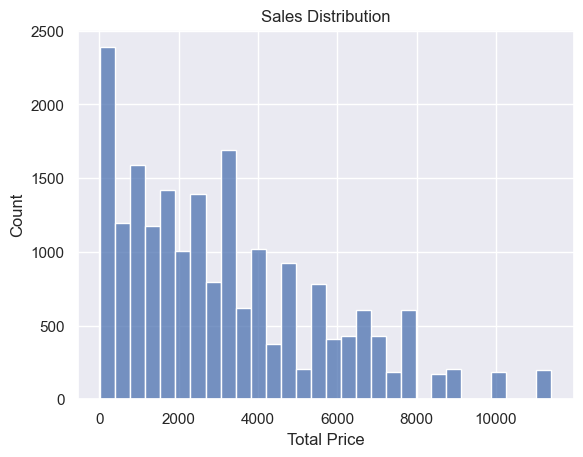

In [146]:
sns.histplot(data=df, x='Total Price', bins=30)
plt.title("Sales Distribution")

Text(0.5, 1.0, 'Sales Distribution')

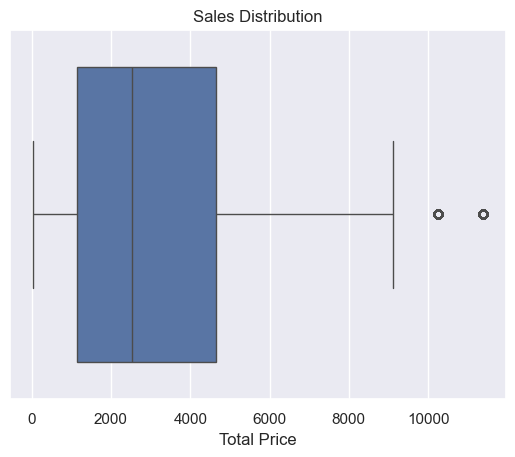

In [147]:
sns.boxplot(data=df, x='Total Price')
plt.title("Sales Distribution")

**IQR Analysis**

In [148]:
import numpy as np

In [149]:
Q1 = df['Total Price'].quantile(0.25)
Q3 = df['Total Price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df['outlier_id'] = np.where((df['Total Price'] < lower_bound) | (df['Total Price'] > upper_bound), 'outlier', 'non-outlier')

In [150]:
outliers = df[df['outlier_id'] == 'outlier']
outliers.head()

,Customer ID,Age,Gender,Loyalty Member,Product Type,SKU,Rating,Order Status,Payment Method,Total Price,Unit Price,Quantity,Purchase Date,Shipping Type,Add-on Total,outlier_id
10016,11022,26,Male,Yes,Smartphone,SMP234,1,Cancelled,PayPal,11396.80,1139.68,10,2024-05-08,Expedited,200.68,outlier
10021,11029,40,Female,No,Smartphone,SMP234,5,Completed,Bank Transfer,10257.12,1139.68,9,2024-05-16,Expedited,0.00,outlier
10048,11046,47,Male,No,Smartphone,SMP234,4,Completed,Bank Transfer,11396.80,1139.68,10,2024-03-31,Same Day,93.55,outlier
10062,11063,78,Male,No,Smartphone,SMP234,1,Completed,PayPal,10257.12,1139.68,9,2024-01-10,Standard,85.70,outlier
10134,11118,50,Female,No,Smartphone,SMP234,3,Completed,PayPal,10257.12,1139.68,9,2024-06-21,Expedited,110.08,outlier


In [151]:
outlier_counts = df['outlier_id'].value_counts()
total_count = len(df)
outlier_proportions = outlier_counts / total_count

In [152]:
outlier_counts

outlier_id
non-outlier    19617
outlier          383
Name: count, dtype: int64

In [153]:
outlier_proportions

outlier_id
non-outlier    0.98085
outlier        0.01915
Name: count, dtype: float64

Remove outliers by keeping only rows labeled as 'non-outlier'

In [154]:
df = df[df['outlier_id'] == 'non-outlier']

In [155]:
df.head()

,Customer ID,Age,Gender,Loyalty Member,Product Type,SKU,Rating,Order Status,Payment Method,Total Price,Unit Price,Quantity,Purchase Date,Shipping Type,Add-on Total,outlier_id
0,1000,53,Male,No,Smartphone,SKU1004,2,Cancelled,Credit Card,5538.33,791.19,7,2024-03-20,Standard,40.21,non-outlier
1,1000,53,Male,No,Tablet,SKU1002,3,Completed,PayPal,741.09,247.03,3,2024-04-20,Overnight,26.09,non-outlier
2,1002,41,Male,No,Laptop,SKU1005,3,Completed,Credit Card,1855.84,463.96,4,2023-10-17,Express,0.00,non-outlier
3,1002,41,Male,Yes,Smartphone,SKU1004,2,Completed,Cash,3164.76,791.19,4,2024-08-09,Overnight,60.16,non-outlier
4,1003,75,Male,Yes,Smartphone,SKU1001,5,Completed,Cash,41.50,20.75,2,2024-05-21,Express,35.56,non-outlier


In [156]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19617 entries, 0 to 19999
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Customer ID     19617 non-null  int64  
 1   Age             19617 non-null  int64  
 2   Gender          19617 non-null  object 
 3   Loyalty Member  19617 non-null  object 
 4   Product Type    19617 non-null  object 
 5   SKU             19617 non-null  object 
 6   Rating          19617 non-null  int64  
 7   Order Status    19617 non-null  object 
 8   Payment Method  19617 non-null  object 
 9   Total Price     19617 non-null  float64
 10  Unit Price      19617 non-null  float64
 11  Quantity        19617 non-null  int64  
 12  Purchase Date   19617 non-null  object 
 13  Shipping Type   19617 non-null  object 
 14  Add-on Total    19617 non-null  float64
 15  outlier_id      19617 non-null  object 
dtypes: float64(3), int64(4), object(9)
memory usage: 2.5+ MB


**Check the distribution after removing the outliers**

Text(0.5, 1.0, 'Sales Distribution')

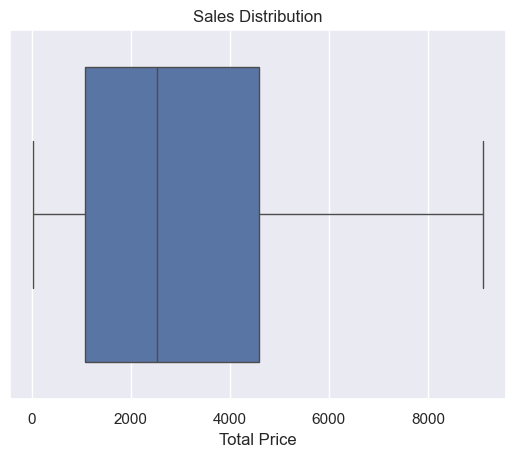

In [157]:
sns.boxplot(data=df, x='Total Price')
plt.title("Sales Distribution")

In [158]:
df.describe()

,Customer ID,Age,Rating,Total Price,Unit Price,Quantity,Add-on Total
count,19617.000000,19617.000000,19617.000000,19617.000000,19617.000000,19617.000000,19617.000000
mean,10384.929296,48.980017,3.095835,3030.343855,567.678029,5.406739,61.877101
std,5629.869296,18.044020,1.220154,2329.238024,305.209981,2.841389,57.713305
min,1000.000000,18.000000,1.000000,20.750000,20.750000,1.000000,0.000000
25%,5398.000000,33.000000,2.000000,1083.540000,361.180000,3.000000,7.680000
50%,9841.000000,49.000000,3.000000,2528.260000,463.960000,5.000000,51.310000
75%,15401.000000,65.000000,4.000000,4595.000000,791.190000,8.000000,93.360000
max,19998.000000,80.000000,5.000000,9117.440000,1139.680000,10.000000,292.770000


Save the cleaned data to csv file

In [163]:
df.to_csv('clean_data.csv', index=False)